***
<a id='lesson-9'></a>
# Epicycle: a circle rolling over another circle
***

Circle moving on other circle is a frequent motif in the models of planetary model.  For example, imagine descirbing the motion of moon; in a helio-centric model, moon circles earth while the earth circles around the sun. 

Fourier showed that ANY curve can be described as a motion of a circle which is moving on another circle, which is moving on another circle and so on. In this lesson, we will explore the Fourier analysis using complex numbers.

We want to model a closed curve in two dimensions; as a simplistic example, consider a circle with center at origin given by $x^2 + y^2 = c^2$, with $c$ being the radius of the circle. Of specific interest is the parametric description with parameter $t$, the circle has following parametric description: $x(t) = c \cos(t)$ and $y(t) = c \sin(t)$. The complex number description of this parametrization is given by $z(t) = c \exp(j t)$ where $j= \sqrt{-1}$. 

Let us consider:  $z(t) = c e^{jt}$, this has $z(t) = z(t+ 2 \pi)$, i.e. with a period of $2\pi$ any point returns to itself. 

Now consider: $z(t) = c e^{njt}$, this has $z(t) = z(t + 2\pi/n)$, i.e. with a period of $2\pi/n$ evey point returns to itself. 

For the sake of having a period 1 unit of time and fractions of it, we will consider $z(t) = c e^{2\pi n j t}$, which has a period of 1/n unit of time.



In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt


See python documentation for `cmath` at https://docs.python.org/3.5/library/cmath.html

Consider an epicycle given by: $z(t) = c_1 e^{2\pi jt} + c_2 e^{30\pi jt}$

Consider that there are a series of observations $\vec{r}_i= (x_i,y_i),\, i\in[1,N]$. We will form the closed curve by $\vec{r}_{N+i} = \vec{r}_i$. We want to find a epicyclic desription of the complex function $z(t)$ such that for $t_i=\tau*i$, we have $z(t_i)=(x_i,y_i)$.  That is, we want to find a description
$$  z(t) = \sum_n c_n * e^{2 \pi j~n~t} \tag{eq:1}
$$
where the coefficient $c_n$ can be a complex number, and $n \in \mathcal{Z}$; later we will show that 
$\tau = \frac{1}{N}$.

Lets try formulate the problem. Given $z_i \forall i \in [1,N]$, with $z_i \equiv z(t_i)$, find $c_n$ in the Equation eq:1 above. 

Solution: Consider $$z(t)*e^{- 2\pi j m t} = \sum_n c_n * e^{2 \pi j~(n-m)~t}$$
then integrating on both sides from $t=0$ $t=1$, gives us 
$$ \int_0^1 dt~z(t)*e^{- 2\pi j m t} = c_m \implies c_m = \tau \sum_{i=1}^{N} z_i*e^{-2\pi j m~i \tau}
$$
Typically $c_n$ is found for $|n| \le n_{max}$ i.e. $n \in [-n_{max}, \cdots, 0 , \cdots, -n_{max}]$

Now given the above created dictionary, reconstruct the curve from it


You are given three shapes: curve_para-1-v2.dat, hut-2.dat and pi-3.dat

Find the fourier coefficeints for each of them. Plot the reconstructed curves. Comment

# Tasks:::
1. Write function `compute_Fourier_dict( zvals, n_max )` to return a dictionary for coefficients with index $-n_{max} \le n \le n_{max}$
2. Write function to take the dictornary of fourier coefficents and plot the 'reconstrcution'; funciton `reconstruct_Fourier_dict( fourier_dict )`
3. Use thes functions on the three examples provided to you. Comment.
4. Use Inkscape (Unix) to draw your own shape, and get the curve data and get fourier coefficients, and reconstruction

In [56]:
def compute_Fourier_dict(zvals, n_max):
    fourier_dict = {}
    T = len(zvals)
    for n in range(-1*n_max, n_max + 1):
        fourier_dict[n] = 0
        for t in range(T):
            fourier_dict[n] += zvals[t] * cmath.e**(-1j * 2*cmath.pi * n * t / T)
        fourier_dict[n] /= T
    return fourier_dict

In [28]:
def reconstruct_Fourier_dict(fourier_dict, T=1000):
    zvals = []
    for t in range(T):
        zval = 0
        for n in fourier_dict.keys():
            zval += fourier_dict[n] * cmath.e**(1j* 2*cmath.pi * n * t / T)
        zvals.append(zval)
    return np.array(zvals)


In [29]:
zval1 = []
with open('curve1.dat', 'r') as f:
    all_lines = f.readlines()

for line in all_lines:
    line = line.strip()
    line = line.split()
    zval1.append(float(line[0]) + float(line[1]) * 1j)


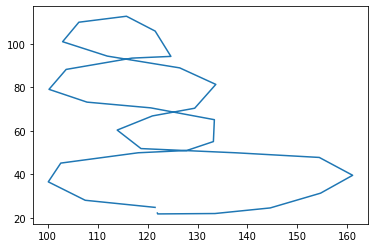

In [30]:
zv = np.array(zval1)
plt.plot(zv.real, zv.imag)

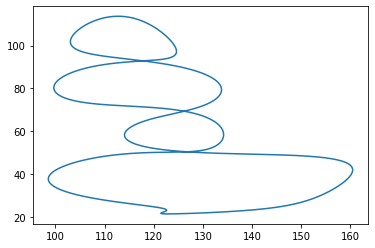

In [31]:
f_dict = compute_Fourier_dict(zval1, 10)
shape1 = reconstruct_Fourier_dict(f_dict)
plt.plot(shape1.real, shape1.imag)


In [33]:
zval2 = []
with open('curve2.dat', 'r') as f2:
    all_lines = f2.readlines()

for line in all_lines:
    line = line.strip()
    line = line.split()
    zval2.append(float(line[0]) + float(line[1]) * 1j)


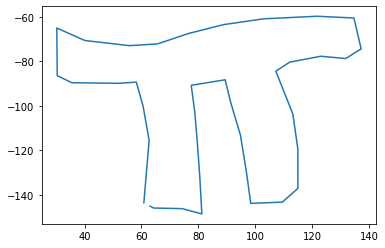

In [36]:
zv2 = np.array(zval2)
plt.plot(zv2.real, zv2.imag)

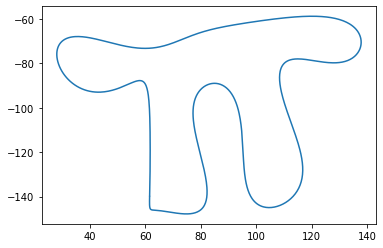

In [37]:
f_dict2 = compute_Fourier_dict(zval2, 10)
shape2 = reconstruct_Fourier_dict(f_dict2)
plt.plot(shape2.real, shape2.imag)

In [51]:
zval3 = []
with open('coord.dat', 'r') as f3:
    all_lines = f3.readlines()

for line in all_lines:
    line = line.strip()
    line = line.split()
    zval3.append(float(line[0]) + float(line[1]) * 1j)

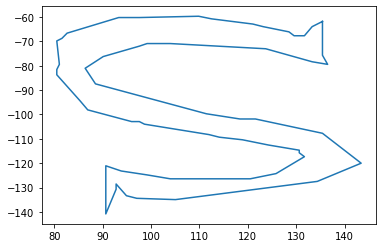

In [55]:
zv = np.array(zval3)
plt.plot(zv.real, -zv.imag)

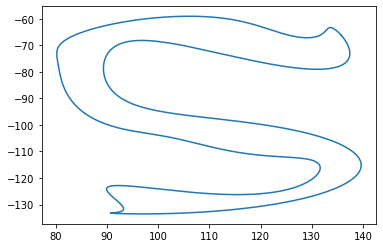

In [53]:
f_dict3 = compute_Fourier_dict(zval3, 10)
shape3 = reconstruct_Fourier_dict(f_dict3)
plt.plot(shape3.real, -shape3.imag)

## short note on making shapes
We will use inkscape program. Draw a shape in inkscape. Save the file as svg, for example 'pi.svg'. From this file, we will extract the path.

Run the following command  in a terminal: 

`grep -v 'inkscape' pi.svg | grep -e cx -e cy  | sed -e 's/"//g' -e 's/cx=//g' -e 's/cy=//g' -e 's/\/>//g' > pi.dat`

In the Jupyter notebook run the following commands:

`curve_pi = loadtxt('pi.dat') # command to load the data` 

and then 

`curve_pi = curve_pi.reshape( int(shape(curve_pi)[0]/2), 2) )`
